<a href="https://colab.research.google.com/github/RomanaNourin/Crime-Activity-Detection/blob/main/Crime_Activity_Detection(CNN%2BGRU)_RMSprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.15


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 104.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installatio

In [ ]:
!kaggle datasets download -d odins0n/ucf-crime-dataset

Dataset URL: https://www.kaggle.com/datasets/odins0n/ucf-crime-dataset
License(s): CC0-1.0
100% 11.0G/11.0G [01:25<00:00, 150MB/s]
100% 11.0G/11.0G [01:25<00:00, 138MB/s]


In [ ]:
!unzip -qq "/content/ucf-crime-dataset.zip"

# **Importing Libraries**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np
import random

**Loading Data**

In [ ]:
test_dir = '/content/Test'
train_dir = '/content/Train'

In [ ]:
# Define the categories and labels
categories_labels = {'Abuse': 0, 'Arrest': 1, 'Arson': 2, 'Assault': 3, 'Burglary': 4, 'Explosion': 5, 'Fighting': 6, 'Vandalism': 7, 'Stealing': 8, 'Robbery': 9, 'Shooting': 10, 'Shoplifting': 11}

In [ ]:
def load_data(base_dir, categories_labels):
    data = []

    # Go through each category
    for category, label in categories_labels.items():
        # The path to the category directory
        category_dir = os.path.join(base_dir, category)

        # Make sure the directory exists
        if os.path.isdir(category_dir):
            # Go through each file in the directory
            for filename in tqdm(os.listdir(category_dir), desc=f"Loading {category}"):
                # Make sure the file is an image
                if filename.endswith(".jpg") or filename.endswith(".png"):
                    # The path to the image
                    image_path = os.path.join(category_dir, filename)

                    try:
                        # Load the image
                        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                        # Resize the image
                        image = cv2.resize(image, (50, 50))

                        # Reshape the image to 4D array (ImageDataGenerator requires 4D array)
                        image = image.reshape((1,) + image.shape + (1,))

                        # Add the image and its label to the data
                        data.append([image, label])
                    except Exception as e:
                        print(f"Error loading image {image_path}: {e}")

    return data

# Load the training and test data
training_data = load_data(train_dir, categories_labels)
test_data = load_data(test_dir, categories_labels)

# Combine the training and test data
total_data = training_data + test_data

print(f"Loaded {len(total_data)} images.")

Loading Shoplifting: 100%|██████████| 7623/7623 [00:01<00:00, 5041.36it/s]

Loaded 338784 images.


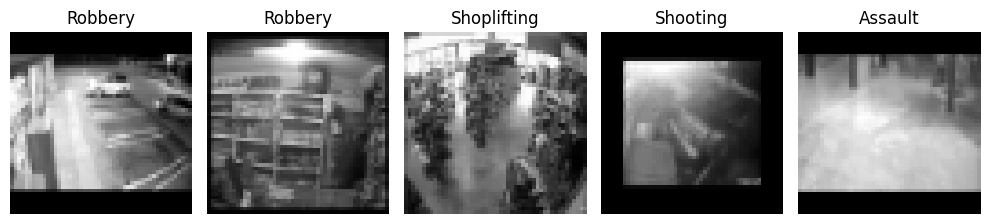

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_sample_images(data, categories_labels, num_samples=5):
    # Reverse the categories_labels dictionary to map labels back to category names
    labels_to_categories = {v: k for k, v in categories_labels.items()}

    plt.figure(figsize=(10, 10))

    # Randomly select a few images to display
    indices = np.random.choice(len(data), num_samples, replace=False)

    for i, idx in enumerate(indices):
        image, label = data[idx]

        # Reshape the image to display correctly (50x50 in your case)
        image = image.reshape(50, 50)

        # Get the corresponding category name for the label
        category_name = labels_to_categories[label]

        # Display the image
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(category_name)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Assuming you have a dictionary 'categories_labels'
# e.g., categories_labels = {'Abuse': 0, 'Arrest': 1, 'Arson': 2, ...}

# Display 5 sample images from total_data with their categorical labels
show_sample_images(total_data, categories_labels, num_samples=5)


**Installing packages**

In [ ]:
!sudo pip install keras
!pip install np_utils
!pip install pydot


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56437 sha256=7a9c863feeef5140b6074daacd0756a3f7e72281f8176ba49ce16d9a59923fad
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import GRU
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
from keras.layers import LSTM, TimeDistributed, Conv1D, MaxPooling1D
from keras.layers import Dense, Dropout, Flatten
from keras.layers import concatenate
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model
from tensorflow.python.keras.callbacks import ModelCheckpoint, CSVLogger
import time


# Initialize lists to store the images and the labels
images = []
labels = []

# Go through each image and its label in the total_data
for image, label in total_data:
    images.append(image)
    labels.append(label)

# Convert the lists into numpy arrays
images = np.array(images)
labels = np.array(labels)
print(images.shape)

# Reshape images for GRU
images_gru = images.reshape(images.shape[0], -1, 1)  # Added third dimension for features

# Set a seed for reproducibility
seed = 42

# Split the data into training and testing sets for CNN
train_images_cnn, test_images_cnn, train_labels_cnn, test_labels_cnn = train_test_split(images, labels, test_size=0.2, random_state=seed)

# Split the data into training and testing sets for GRU
train_images_gru, test_images_gru, train_labels_gru, test_labels_gru = train_test_split(images_gru, labels, test_size=0.2, random_state=seed)

# Convert labels to categorical for CNN
train_labels_cnn = np_utils.to_categorical(train_labels_cnn, len(categories_labels))
test_labels_cnn = np_utils.to_categorical(test_labels_cnn, len(categories_labels))

# Convert labels to categorical for GRU
train_labels_gru = np_utils.to_categorical(train_labels_gru, len(categories_labels))
test_labels_gru = np_utils.to_categorical(test_labels_gru, len(categories_labels))

# Remove the second dimension from data
train_images_cnn = np.squeeze(train_images_cnn, axis=1)
test_images_cnn = np.squeeze(test_images_cnn, axis=1)


# CNN Model
model_CNN = Sequential()
model_CNN.add(Conv2D(64, kernel_size=(3, 3), padding='same', input_shape=(50, 50, 1)))
model_CNN.add(LeakyReLU(alpha=0.1))
model_CNN.add(MaxPooling2D((2, 2), padding='same'))
model_CNN.add(Dropout(0.25))
model_CNN.add(Conv2D(128, (3, 3), padding='same'))
model_CNN.add(LeakyReLU(alpha=0.1))
model_CNN.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_CNN.add(Dropout(0.25))
model_CNN.add(Conv2D(256, (3, 3), padding='same'))
model_CNN.add(LeakyReLU(alpha=0.1))
model_CNN.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_CNN.add(Dropout(0.4))
model_CNN.add(Flatten())
model_CNN.add(Dense(256))
model_CNN.add(LeakyReLU(alpha=0.1))
model_CNN.add(Dropout(0.5))


# GRU Model
model_gru = Sequential()
model_gru.add(GRU(units=8, return_sequences=True, input_shape=(2500, 1), activation='tanh'))
model_gru.add(GRU(units=8, return_sequences=True))
model_gru.add(Dense(4, activation='tanh'))
model_gru.add(Dropout(0.2))
model_gru.add(Flatten())

# Combine CNN and GRU model
nb_classes = 12
combined_gru = concatenate([model_CNN.output, model_gru.output], axis=-1)
output_gru = Dense(nb_classes, activation='softmax')(combined_gru)
model_final_gru = Model(inputs=[model_CNN.input, model_gru.input], outputs=output_gru)

# Plot and compile the model
plot_model(model_final_gru, to_file='model_plot_gru.png', show_shapes=True, show_layer_names=True)

model_final_gru.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

# Callbacks
csv_logger_gru = CSVLogger('training_gru.log', separator=',', append=False)
mc_gru = ModelCheckpoint('CNN_GRU.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Training GRU model
time1 = time.time()
history_gru = model_final_gru.fit([train_images_cnn, train_images_gru], train_labels_gru, batch_size=1000, epochs=20,
                                  validation_data=([test_images_cnn, test_images_gru], test_labels_gru),
                                  callbacks=[mc_gru, csv_logger_gru])
print (("Training time for GRU model=", time.time()-time1))

# Save training history
np.save("CNN_GRU_history.npy", history_gru.history)


(338784, 1, 50, 50, 1)
Epoch 1/20
272/272 [==============================] - ETA: 0s - loss: 1.5759 - accuracy: 0.6770
Epoch 00001: val_loss improved from inf to 0.27573, saving model to CNN_GRU.h5
272/272 [==============================] - 141s 472ms/step - loss: 1.5759 - accuracy: 0.6770 - val_loss: 0.2757 - val_accuracy: 0.9186
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


272/272 [==============================] - ETA: 0s - loss: 0.1678 - accuracy: 0.9588
Epoch 00002: val_loss improved from 0.27573 to 0.10376, saving model to CNN_GRU.h5
272/272 [==============================] - 127s 467ms/step - loss: 0.1678 - accuracy: 0.9588 - val_loss: 0.1038 - val_accuracy: 0.9714
Epoch 3/20
272/272 [==============================] - ETA: 0s - loss: 0.0527 - accuracy: 0.9850
Epoch 00003: val_loss improved from 0.10376 to 0.02989, saving model to CNN_GRU.h5
272/272 [==============================] - 127s 467ms/step - loss: 0.0527 - accuracy: 0.9850 - val_loss: 0.0299 - val_accuracy: 0.9915
Epoch 4/20
272/272 [==============================] - ETA: 0s - loss: 0.0353 - accuracy: 0.9901
Epoch 00004: val_loss improved from 0.02989 to 0.02609, saving model to CNN_GRU.h5
272/272 [==============================] - 127s 467ms/step - loss: 0.0353 - accuracy: 0.9901 - val_loss: 0.0261 - val_accuracy: 0.9935
Epoch 5/20
272/272 [==============================] - ETA: 0s - loss:

In [ ]:
from keras.models import load_model
fashion_model = load_model('./CNN_GRU.h5') # load model
fashion_model.summary() # summarize model.

from contextlib import redirect_stdout
with open('/content/CNN_GRU.h5'+".xls", 'w') as f:
    with redirect_stdout(f):
        fashion_model.summary()

val_loss, val_accuracy=fashion_model.evaluate([test_images_cnn, test_images_gru] ,test_labels_gru) ## to get test accuracy and losses
print(val_loss, val_accuracy)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 conv2d_input (InputLayer)   [(None, 50, 50, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 50, 50, 64)           640       ['conv2d_input[0][0]']        
                                                                                                  
 leaky_re_lu (LeakyReLU)     (None, 50, 50, 64)           0         ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 25, 25, 64)           0         ['leaky_re_lu[0][0]']         
 D)                                                                                           

In [ ]:
time2=time.time()
predict_prob=fashion_model.predict([test_images_cnn, test_images_gru])
y_pred=np.argmax(predict_prob,axis=1)
print ('classification time:', time.time()-time2)

##print (y_pred)
y_true=np.argmax(test_labels_cnn, axis=1)
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_true, y_pred)
print (cm)
print(classification_report(y_true, y_pred))

precision = precision_score(y_true, y_pred, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_true, y_pred, average='weighted')
print('Recall: %f' % recall)
# f1: tp / (tp + fp + fn)
f1 = f1_score(y_true, y_pred, average='weighted')
print('F1 score: %f' % f1)
#-----------  IoU
from sklearn.metrics import jaccard_score
print ('IoU:', jaccard_score(y_true, y_pred, average='micro'))


test_eval = fashion_model.evaluate([test_images_cnn, test_images_gru], test_labels_cnn)

loss, accuracy = fashion_model.evaluate([train_images_cnn, train_images_gru], train_labels_cnn)
print('loss_train: ', loss, 'accuracy_train: ', accuracy)
print('Test loss:', test_eval[0], 'Test accuracy:', test_eval[1])

2118/2118 [==============================] - 104s 49ms/step
classification time: 106.20575428009033
[[3798    0    0    2    4    3    2    4    0    2    1    0]
 [   4 6061    6    0    3    4    1    2    0    1    3   11]
 [   1    5 5335    0    0    4    1    2    2    0    0    1]
 [   1    0    2 2574    4    1    1    1    2   12    0    2]
 [   2    0    1    0 9372    0    0    2    1   15    0    2]
 [   1    0    1    0    6 5000    0    1    2    0    1    2]
 [   3    3    0    0    7    0 5274    1    2    1    1    0]
 [   2    0    2    0    8    1    4 2914    3    4    1    0]
 [   0    0    2    0    1    2    0    2 9369   16    2    1]
 [   1    0    0    7   10    6    2    3   19 8430    0    0]
 [   1   38    1    0    8    0    0    1    0    3 2859    0]
 [   1    0    0    0    1    1    0    1    0    0    0 6466]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3816
           1       0.99      0.99 

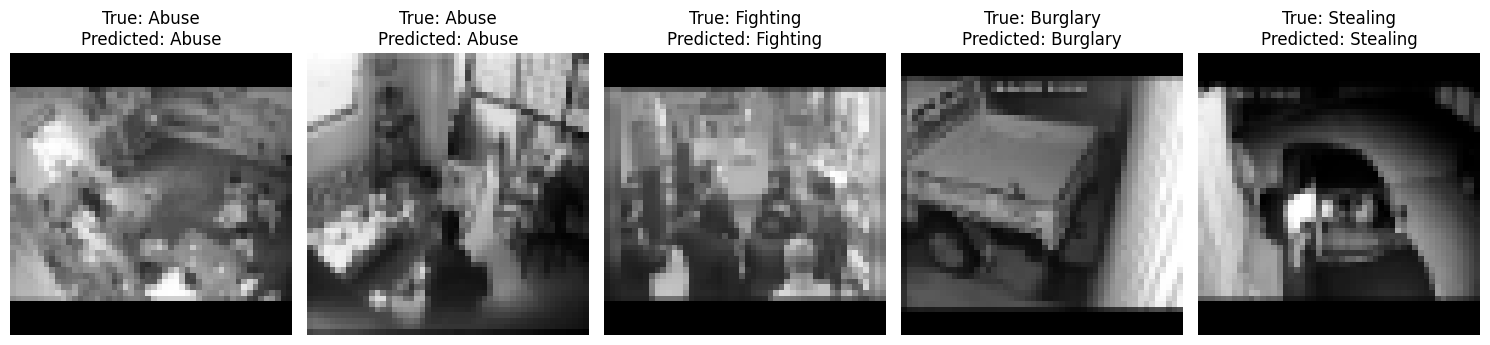

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_validation_images(test_images_cnn, test_images_gru, y_true, y_pred, categories_labels, num_samples=5):
    # Reverse the categories_labels dictionary to map labels back to category names
    labels_to_categories = {v: k for k, v in categories_labels.items()}

    plt.figure(figsize=(15, 15))

    # Randomly select a few images to display
    indices = np.random.choice(len(test_images_cnn), num_samples, replace=False)

    for i, idx in enumerate(indices):
        image = test_images_cnn[idx]

        # Get the true and predicted labels
        true_label = labels_to_categories[y_true[idx]]
        predicted_label = labels_to_categories[y_pred[idx]]

        # Reshape the image to display correctly (50x50 in your case)
        image = image.reshape(50, 50)

        # Display the image
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display 5 validation images with their true and predicted labels
show_validation_images(test_images_cnn, test_images_gru, y_true, y_pred, categories_labels, num_samples=5)

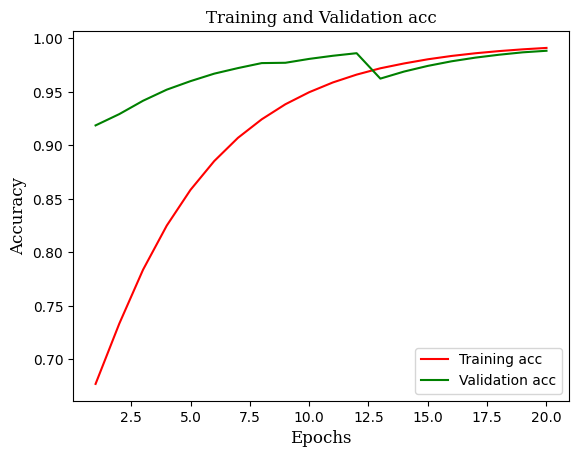

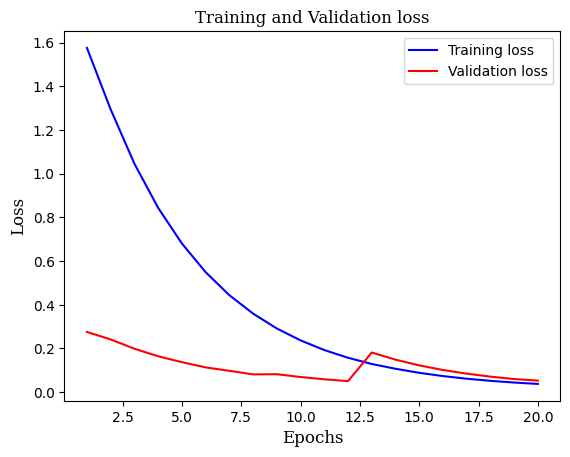

In [ ]:
import matplotlib.pyplot as plt

history_dict=history_gru.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
epochs=range(1, len(acc_values)+1)
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
loss_values=smooth_curve(loss_values)
val_loss_values=smooth_curve(val_loss_values)
acc_values=smooth_curve(acc_values)
val_acc_values=smooth_curve(val_acc_values)

font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12}


plt.plot(epochs, acc_values, 'r-', label='Training acc')
plt.plot(epochs, val_acc_values, 'g', label='Validation acc')
plt.title('Training and Validation acc', fontdict=font)
plt.xlabel('Epochs', fontdict=font)
plt.ylabel('Accuracy', fontdict=font)
plt.legend()
plt.savefig("accuracy"+'CNN_GRU'+".png")
plt.show()

plt.plot(epochs, loss_values, 'b-', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and Validation loss', fontdict=font)
plt.xlabel('Epochs',fontdict=font)
plt.ylabel('Loss',fontdict=font)
plt.legend()
plt.savefig("loss"+'CNN_GRU'+".png")
plt.show()

Confusion matrix, without normalization
[[3798    0    0    2    4    3    2    4    0    2    1    0]
 [   4 6061    6    0    3    4    1    2    0    1    3   11]
 [   1    5 5335    0    0    4    1    2    2    0    0    1]
 [   1    0    2 2574    4    1    1    1    2   12    0    2]
 [   2    0    1    0 9372    0    0    2    1   15    0    2]
 [   1    0    1    0    6 5000    0    1    2    0    1    2]
 [   3    3    0    0    7    0 5274    1    2    1    1    0]
 [   2    0    2    0    8    1    4 2914    3    4    1    0]
 [   0    0    2    0    1    2    0    2 9369   16    2    1]
 [   1    0    0    7   10    6    2    3   19 8430    0    0]
 [   1   38    1    0    8    0    0    1    0    3 2859    0]
 [   1    0    0    0    1    1    0    1    0    0    0 6466]]


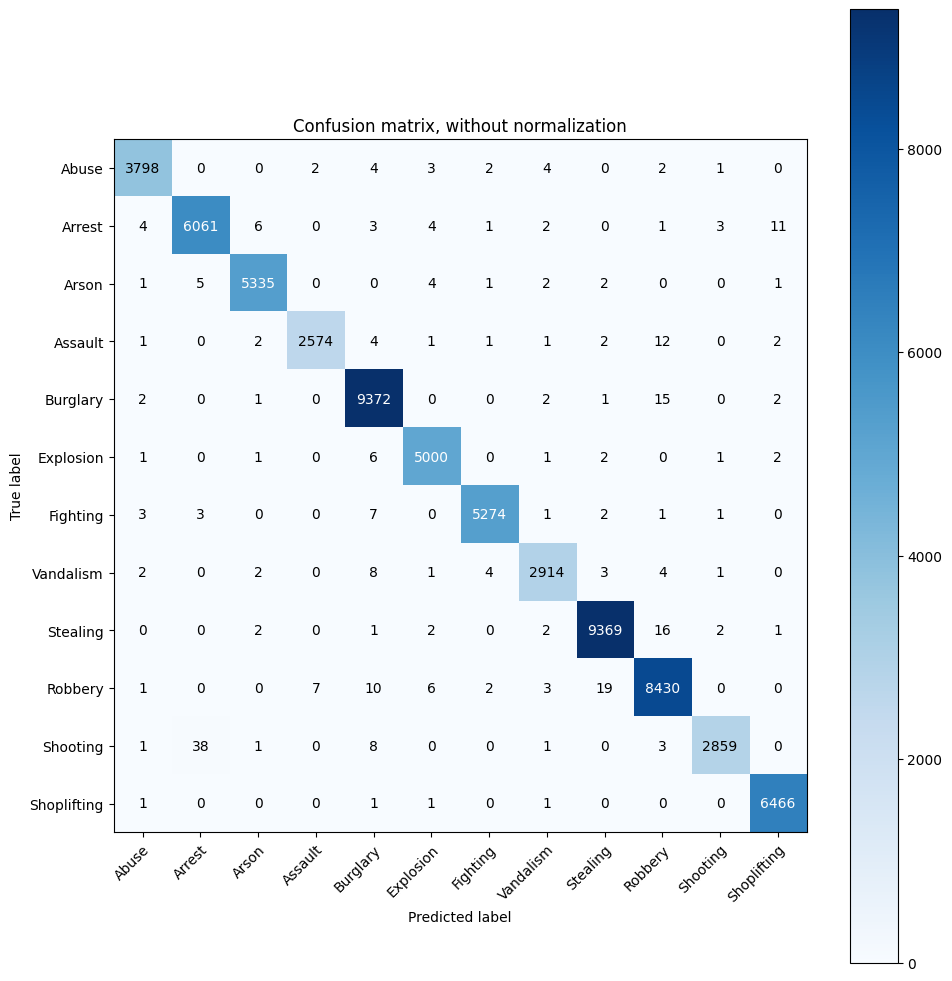

Normalized confusion matrix
[[9.95e-01 0.00e+00 0.00e+00 5.24e-04 1.05e-03 7.86e-04 5.24e-04 1.05e-03
  0.00e+00 5.24e-04 2.62e-04 0.00e+00]
 [6.56e-04 9.94e-01 9.84e-04 0.00e+00 4.92e-04 6.56e-04 1.64e-04 3.28e-04
  0.00e+00 1.64e-04 4.92e-04 1.80e-03]
 [1.87e-04 9.34e-04 9.97e-01 0.00e+00 0.00e+00 7.48e-04 1.87e-04 3.74e-04
  3.74e-04 0.00e+00 0.00e+00 1.87e-04]
 [3.85e-04 0.00e+00 7.69e-04 9.90e-01 1.54e-03 3.85e-04 3.85e-04 3.85e-04
  7.69e-04 4.62e-03 0.00e+00 7.69e-04]
 [2.13e-04 0.00e+00 1.06e-04 0.00e+00 9.98e-01 0.00e+00 0.00e+00 2.13e-04
  1.06e-04 1.60e-03 0.00e+00 2.13e-04]
 [1.99e-04 0.00e+00 1.99e-04 0.00e+00 1.20e-03 9.97e-01 0.00e+00 1.99e-04
  3.99e-04 0.00e+00 1.99e-04 3.99e-04]
 [5.67e-04 5.67e-04 0.00e+00 0.00e+00 1.32e-03 0.00e+00 9.97e-01 1.89e-04
  3.78e-04 1.89e-04 1.89e-04 0.00e+00]
 [6.81e-04 0.00e+00 6.81e-04 0.00e+00 2.72e-03 3.40e-04 1.36e-03 9.91e-01
  1.02e-03 1.36e-03 3.40e-04 0.00e+00]
 [0.00e+00 0.00e+00 2.13e-04 0.00e+00 1.06e-04 2.13e-04 0.00e+00 2.1

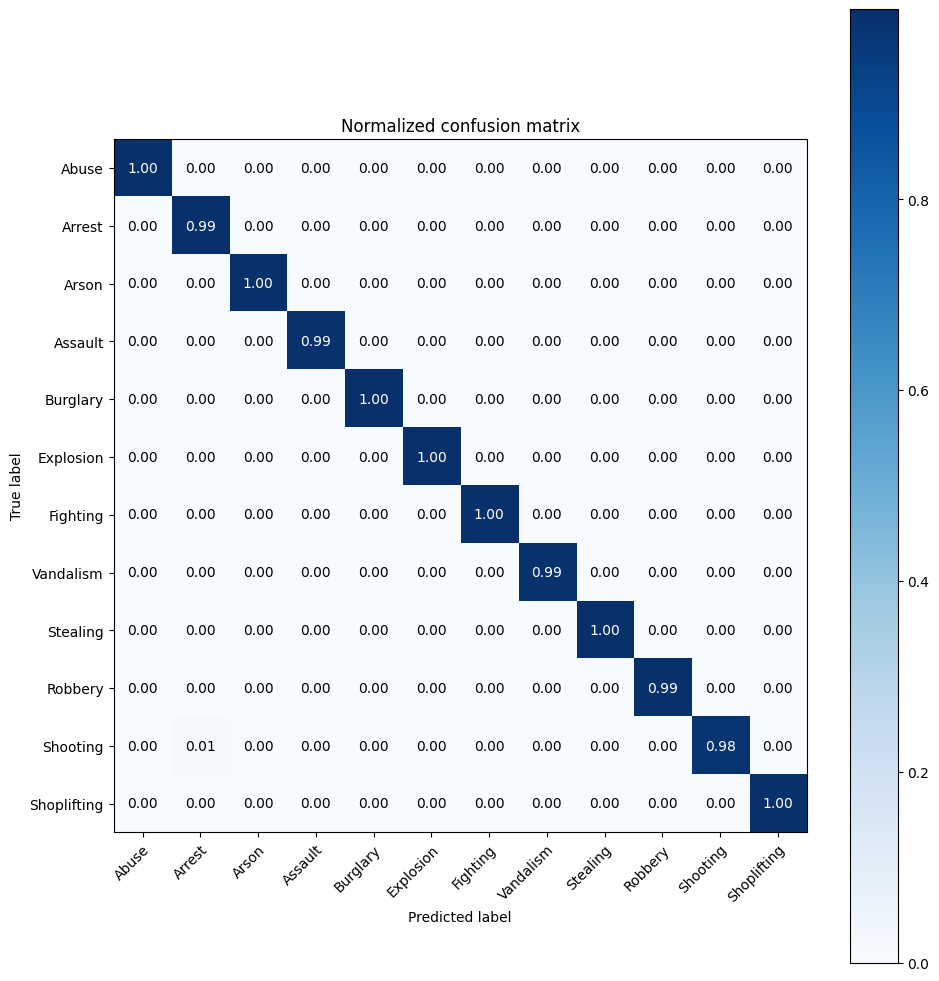

In [ ]:
class_names = ['Abuse', 'Arrest', 'Arson', 'Assault', 'Burglary', 'Explosion', 'Fighting', 'Vandalism', 'Stealing', 'Robbery', 'Shooting', 'Shoplifting']


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 14}
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.savefig('confusion matrix1'+'CNN_GRU'+'.png')
plt.show()
# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('confusion matrix2'+'CNN_GRU'+'.png')
plt.show()

2118/2118 [==============================] - 107s 50ms/step


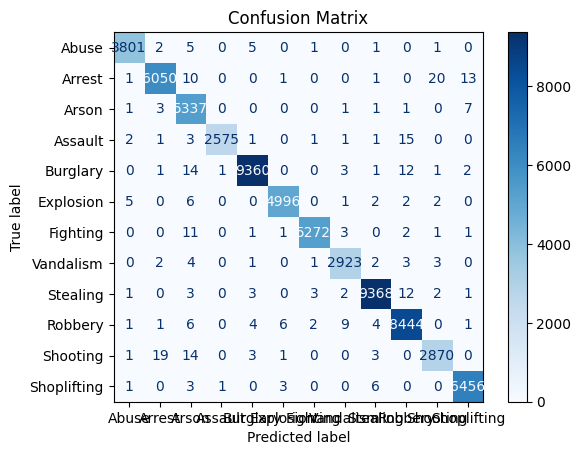

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Make predictions using the trained model on test data
predictions = model_final_gru.predict([test_images_cnn, test_images_gru])

# Step 2: Convert predictions from one-hot encoding back to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert true labels (from one-hot encoding) back to class labels
true_classes = np.argmax(test_labels_gru, axis=1)

# Step 3: Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Step 4: Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories_labels)
disp.plot(cmap=plt.cm.Blues)

# Step 5: Show the plot
plt.title('Confusion Matrix')
plt.show()


2118/2118 [==============================] - 105s 50ms/step
Classification time: 106.62123942375183
[[3789    4    3    0    7    6    0    4    2    1    0    0]
 [   1 6031   13    1    2    5    1    0    1    2   27   12]
 [   0    0 5329    0    7    3    1    1    0    1    0    9]
 [   1    1    0 2587    3    2    0    2    0    3    1    0]
 [   0    2    3    0 9374    3    0    0    0   13    0    0]
 [   2    0    2    0    5 5003    0    0    0    1    1    0]
 [   0    0    4    0    9    1 5272    3    0    1    0    2]
 [   1    3    7    1    1    1    1 2920    1    3    0    0]
 [   1    1    2    1    3    4    0    0 9368   14    0    1]
 [   0    0    6   12   21    6    3    2    6 8420    2    0]
 [   0    4    1    1   18    1    0    0    1    0 2885    0]
 [   1    6    2    1    1    3    0    0    2    0    0 6454]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3816
           1       1.00      0.99 

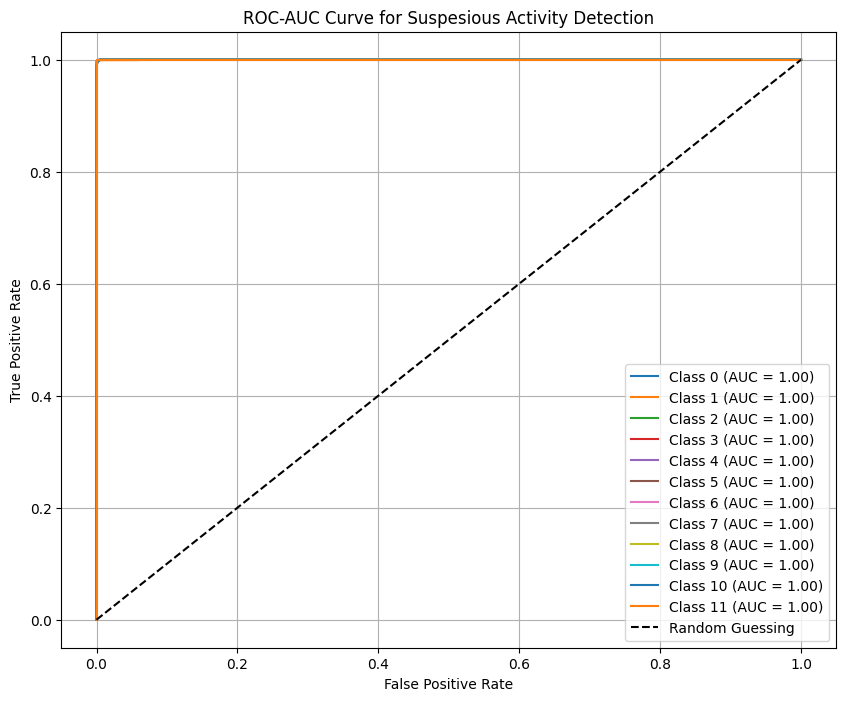

Micro-average AUC: 1.00
Macro-average AUC: 1.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score, f1_score, jaccard_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Timing the predictions
time2 = time.time()
predict_prob = fashion_model.predict([test_images_cnn, test_images_gru])
y_pred = np.argmax(predict_prob, axis=1)
print('Classification time:', time.time() - time2)

# True labels
y_true = np.argmax(test_labels_cnn, axis=1)

# Classification metrics
cm = confusion_matrix(y_true, y_pred)
print(cm)
print(classification_report(y_true, y_pred))

# Precision, recall, F1
precision = precision_score(y_true, y_pred, average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_true, y_pred, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_true, y_pred, average='weighted')
print('F1 score: %f' % f1)

# Intersection over Union (IoU)
print('IoU:', jaccard_score(y_true, y_pred, average='micro'))

# Model evaluation
test_eval = fashion_model.evaluate([test_images_cnn, test_images_gru], test_labels_cnn)
loss, accuracy = fashion_model.evaluate([train_images_cnn, train_images_gru], train_labels_cnn)
print('Train loss:', loss, 'Train accuracy:', accuracy)
print('Test loss:', test_eval[0], 'Test accuracy:', test_eval[1])

# --------- ROC-AUC Curve ---------

# Step 1: Binarize the true labels for the one-vs-rest approach
n_classes = len(np.unique(y_true))  # Total number of classes
y_true_bin = label_binarize(y_true, classes=range(n_classes))

# Step 2: Calculate ROC curve and AUC for each class
fpr = dict()  # False Positive Rate for each class
tpr = dict()  # True Positive Rate for each class
roc_auc = dict()  # AUC for each class

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predict_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 3: Plot the ROC curve for each class with AUC
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line representing random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Customize the plot
plt.title('ROC-AUC Curve for Suspesious Activity Detection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

# Step 4: Show the plot
plt.show()

# Step 5: Calculate and print overall AUC score (micro and macro average)
micro_roc_auc = roc_auc_score(y_true_bin, predict_prob, average='micro')
macro_roc_auc = roc_auc_score(y_true_bin, predict_prob, average='macro')

print(f'Micro-average AUC: {micro_roc_auc:.2f}')
print(f'Macro-average AUC: {macro_roc_auc:.2f}')
